# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 9.85MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 256kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.74MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


C:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 1.2894,  0.0035,  0.0112, -0.8426,  0.8691, -0.6659,  0.2559,  0.9909,
         -0.4850,  0.4379]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [13]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        # Exercício 1
        print(f"- Época: {i+1}/{n_epochs}, batch: {k+1}/{len(loader_train)}")

- Época: 1/5, batch: 1/600
- Época: 1/5, batch: 2/600
- Época: 1/5, batch: 3/600
- Época: 1/5, batch: 4/600
- Época: 1/5, batch: 5/600
- Época: 1/5, batch: 6/600
- Época: 1/5, batch: 7/600
- Época: 1/5, batch: 8/600
- Época: 1/5, batch: 9/600
- Época: 1/5, batch: 10/600
- Época: 1/5, batch: 11/600
- Época: 1/5, batch: 12/600
- Época: 1/5, batch: 13/600
- Época: 1/5, batch: 14/600
- Época: 1/5, batch: 15/600
- Época: 1/5, batch: 16/600
- Época: 1/5, batch: 17/600
- Época: 1/5, batch: 18/600
- Época: 1/5, batch: 19/600
- Época: 1/5, batch: 20/600
- Época: 1/5, batch: 21/600
- Época: 1/5, batch: 22/600
- Época: 1/5, batch: 23/600
- Época: 1/5, batch: 24/600
- Época: 1/5, batch: 25/600
- Época: 1/5, batch: 26/600
- Época: 1/5, batch: 27/600
- Época: 1/5, batch: 28/600
- Época: 1/5, batch: 29/600
- Época: 1/5, batch: 30/600
- Época: 1/5, batch: 31/600
- Época: 1/5, batch: 32/600
- Época: 1/5, batch: 33/600
- Época: 1/5, batch: 34/600
- Época: 1/5, batch: 35/600
- Época: 1/5, batch: 36/600
-

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.3097)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

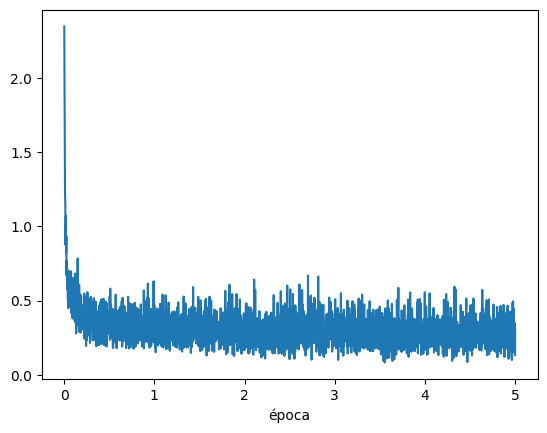

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

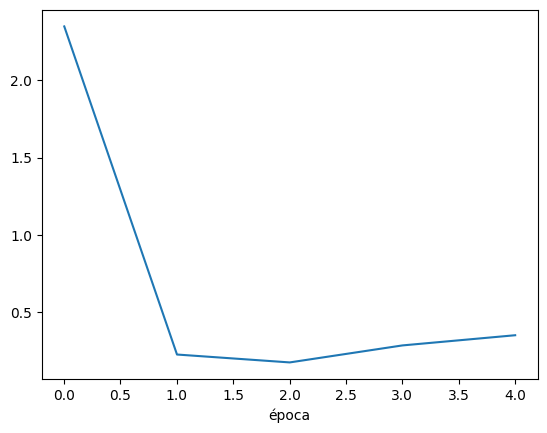

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

In [12]:
len(loader_train)

600

1. Qual é o tamanho do mini-batch?
   - batch_size = 100 -> 100 amostras
2. Em uma época, quantos mini-batches existem?
   - 600
3. Qual é a definição de época?
   - Época refere-se a uma passagem completa de todo o conjunto de dados de treinamento através do algoritmo de aprendizagem

Referências:
- https://medium.com/@ml_artist/what-is-an-epoch-in-machine-learning-459fa5b9c2ea
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning#:~:text=An%20epoch%20is%20when%20all,dataset%20takes%20around%20an%20algorithm.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [14]:
import copy

batch_sizes = [1, 10, 100, 600]
losses_by_batch_size = {}

for bs in batch_sizes:
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)

    # Novo modelo, loss e otimizador para cada teste
    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

    losses = []
    for i in range(n_epochs):
        for x_train, y_train in loader_train:
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
    
    losses_by_batch_size[bs] = copy.deepcopy(losses)


In [17]:
# Exercício 2
n_epochs = 5
losses_by_batch_size = {}

for bs in [1, 10, 100, 600]:
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)
    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

    epoch_losses = []

    for epoch in range(n_epochs):
        batch_losses = []
        for x_train, y_train in loader_train:
            inputs = x_train.view(-1, 28*28)
            outputs = model(inputs)
            loss = criterion(outputs, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())

        mean_loss = np.mean(batch_losses)
        epoch_losses.append(mean_loss)
    
    losses_by_batch_size[bs] = epoch_losses


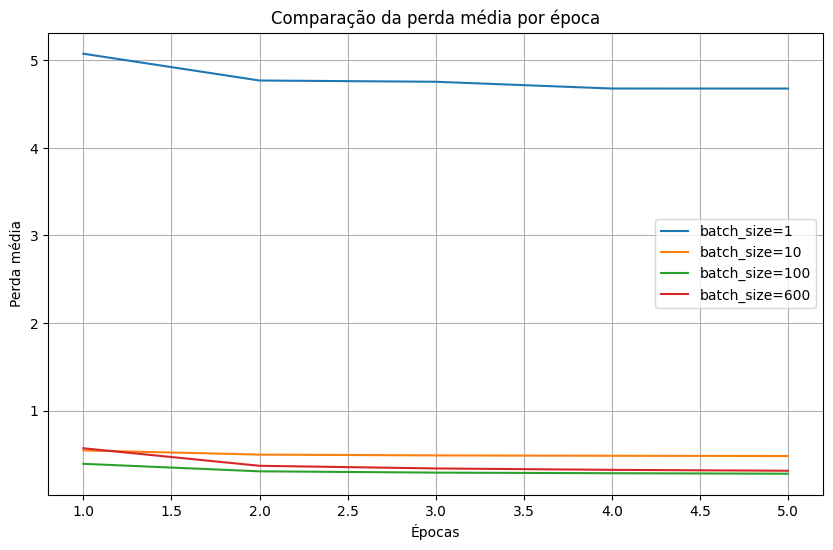

In [18]:
plt.figure(figsize=(10,6))
for bs, losses in losses_by_batch_size.items():
    plt.plot(range(1, n_epochs+1), losses, label=f'batch_size={bs}')
plt.xlabel("Épocas")
plt.ylabel("Perda média")
plt.title("Comparação da perda média por época")
plt.legend()
plt.grid(True)
plt.show()


## Conclusões sobre os experimentos deste notebook


Neste notebook, exploramos uma aplicação prática dos DataLoaders, utilizando diferentes valores de batch_size e o parâmetro shuffle. Isso permitiu treinar o modelo com mini-batches, o que garante maior eficiência computacional. Treinar todos os dados de uma vez pode estourar a memória e ser lento, enquanto o uso de mini-batches permite aproveitar melhor o paralelismo da CPU/GPU, com atualizações mais frequentes dos pesos. Além disso, o uso de DataLoaders melhora a escalabilidade, pois permite carregar datasets grandes em partes. Já o uso do shuffle impede que o modelo aprenda padrões artificiais decorrentes da ordem dos dados, favorecendo uma melhor capacidade de generalização.